In [1]:
import os
import glob
import numpy as np
import bokeh.io
import bokeh.plotting
import bokeh.palettes
from bokeh.transform import jitter
import seaborn as sns
import matplotlib
from bokeh.models import HoverTool, Range1d
from scipy import stats
import pandas as pd
import math

from bokeh.layouts import row
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
def bootstrap_sampling(my_array, bootstrap_samples, bootstrap_replicates):
    bs_samples=np.zeros((bootstrap_replicates, bootstrap_samples))
    bs_rep=np.arange(bootstrap_replicates)
    for i in bs_rep:
        bs_samples[i, :]=np.random.choice(my_array, bootstrap_samples)
    return bs_samples

def bootstrap_stats(bs_samples):
    samples_shape=np.shape(bs_samples)
    bs_means=np.zeros((samples_shape[0], 1))
    bs_IC_means=np.zeros((1, 2))
    bs_medians=np.zeros((samples_shape[0], 1))
    bs_IC_medians=np.zeros((1, 2))
    for i in np.arange(samples_shape[0]):
        bs_means[i]=np.mean(bs_samples[i, :])
        bs_medians[i]=np.median(bs_samples[i, :])
    bs_IC_means[0, 0]=np.quantile(bs_means, .025)
    bs_IC_means[0, 1]=np.quantile(bs_means, .975)
    bs_IC_medians[0, 0]=np.quantile(bs_medians, .025)
    bs_IC_medians[0, 1]=np.quantile(bs_medians, .975)
    return np.mean(bs_means), np.median(bs_medians), bs_IC_means, bs_IC_medians

In [3]:
#set root folder
#path='D:/Pili_and_PaQa_counts_data/fliC-'
#path='G:/Sauvegardes PhD/Covid-19/Pili_and_PaQa_counts_data/PaQa_data/fliC-'
path='D:/Lorenzo/pilH'
os.chdir(path)
extension = 'csv'
list_csv = []
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        if extension in name:
            list_csv.append(os.path.join(root, name))
#os.chdir("C:/users/tala/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/")
os.chdir("C:/users/tala/Desktop/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/")
new_dir = "Data_PaQa\\"
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
os.chdir(new_dir)
combined_csv = pd.concat([pd.read_csv(f) for f in list_csv ], sort=False)
combined_csv.to_csv( "Pili_pilH-_Data_new.csv", index=False, encoding='utf-8-sig')
combined_csv.head()

,,Label,Area,Mean,Min,Max,X,Y,BiologicalReplicate,CellArea,...,Y_PoleBright,AreaPoleBright,MeanPoleBright,TotalFluorescencePoleBright,MinPoleBright,MaxPoleBright,StdPoleBright,Nb_Pili_PoleBright,Nb_Flagella_PoleBright,PolarRatio
0,1,pilH-fliC-_PaQa_solid_0_event2_tirf_RAW_Stack.tif,2560,255,255,255,87.25195,33.47227,1,2740,...,217.66919,316,3004.09810,949295,1005,3759,882.35101,10,0,0.90771
0,1,pilH-fliC-_PaQa_solid_0_event4_tirf_RAW_Stack.tif,1327,255,255,255,58.88809,34.11191,1,1445,...,193.43802,256,2905.67969,743854,1273,3783,913.50452,5,0,0.83834
0,1,pilH-fliC-_PaQa_solid_1_event5_tirf_RAW_Stack.tif,1438,255,255,255,71.40473,24.42211,1,1565,...,225.94845,208,3105.83654,646014,888,3793,949.93060,8,0,0.89949
0,1,NaN,1530,255,255,255,61.85359,23.28824,1,1655,...,0.00000,0,0.00000,0,0,0,0.00000,0,0,0.00000
1,2,PilH-FliC-_Gasket_0_event1_tirf_RAW_Stack.tif,1747,255,255,255,59.83028,23.30366,1,1865,...,196.10017,421,3323.18527,1399061,2993,3645,174.67537,13,0,1.00247


In [6]:
app_root_dir = "C:/Users/tala/Desktop/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/"
os.chdir(app_root_dir + "Data_PaQa\\")
df_full = pd.read_csv("Pili_pilH-_Data_new.csv", sep=',', na_values='*')
df_full['PercentTotalFluoDim']=df_full['TotalFluorescencePoleDim']/df_full['CellTotalFluorescence']
df_full['PercentTotalFluoBright']=df_full['TotalFluorescencePoleBright']/df_full['CellTotalFluorescence']
df_full['TotalPili']=df_full['Nb_Pili_PoleDim']+df_full['Nb_Pili_PoleBright']
df_full['TotalFlagella']=df_full['Nb_Flagella_PoleDim']+df_full['Nb_Flagella_PoleBright']
param1='CellTotalFluorescence'
param2='TotalPili'
poisson_lambda=df_full[param2].mean()

tot_pili_limit=50
df=df_full.loc[df_full[param2]<tot_pili_limit]        

Ncells_per_pili=np.empty((tot_pili_limit), dtype='int16')
N=len(df)
print('Ncells='+str(N), end=', ')
for i in range(tot_pili_limit):
    Ncells_per_pili[i]=len(df.loc[(df[param2]==i)])
    if (i<tot_pili_limit-1):
        print('N_'+str(i)+'pili='+str(Ncells_per_pili[i]), end=', ')
    else: print('N_'+str(i)+'pili='+str(Ncells_per_pili[i]))       
df.head()

Ncells=5, N_0pili=1, N_1pili=0, N_2pili=0, N_3pili=0, N_4pili=0, N_5pili=0, N_6pili=0, N_7pili=0, N_8pili=0, N_9pili=0, N_10pili=0, N_11pili=0, N_12pili=0, N_13pili=0, N_14pili=1, N_15pili=0, N_16pili=0, N_17pili=1, N_18pili=0, N_19pili=0, N_20pili=1, N_21pili=0, N_22pili=0, N_23pili=1, N_24pili=0, N_25pili=0, N_26pili=0, N_27pili=0, N_28pili=0, N_29pili=0, N_30pili=0, N_31pili=0, N_32pili=0, N_33pili=0, N_34pili=0, N_35pili=0, N_36pili=0, N_37pili=0, N_38pili=0, N_39pili=0, N_40pili=0, N_41pili=0, N_42pili=0, N_43pili=0, N_44pili=0, N_45pili=0, N_46pili=0, N_47pili=0, N_48pili=0, N_49pili=0


,,Label,Area,Mean,Min,Max,X,Y,BiologicalReplicate,CellArea,...,MinPoleBright,MaxPoleBright,StdPoleBright,Nb_Pili_PoleBright,Nb_Flagella_PoleBright,PolarRatio,PercentTotalFluoDim,PercentTotalFluoBright,TotalPili,TotalFlagella
0,1,pilH-fliC-_PaQa_solid_0_event2_tirf_RAW_Stack.tif,2560,255,255,255,87.25195,33.47227,1,2740,...,1005,3759,882.35101,10,0,0.90771,0.105991,0.107932,20,0
1,1,pilH-fliC-_PaQa_solid_0_event4_tirf_RAW_Stack.tif,1327,255,255,255,58.88809,34.11191,1,1445,...,1273,3783,913.50452,5,0,0.83834,0.152775,0.162320,14,0
2,1,pilH-fliC-_PaQa_solid_1_event5_tirf_RAW_Stack.tif,1438,255,255,255,71.40473,24.42211,1,1565,...,888,3793,949.93060,8,0,0.89949,0.120131,0.125529,17,0
3,1,NaN,1530,255,255,255,61.85359,23.28824,1,1655,...,0,0,0.00000,0,0,0.00000,0.000000,0.000000,0,0
4,2,PilH-FliC-_Gasket_0_event1_tirf_RAW_Stack.tif,1747,255,255,255,59.83028,23.30366,1,1865,...,2993,3645,174.67537,13,0,1.00247,0.225303,0.226783,23,0


In [7]:
nb_pili=np.zeros((tot_pili_limit, 1))
boot_mean=np.zeros((tot_pili_limit, 1))
boot_median=np.zeros((tot_pili_limit, 1))
boot_IC_mean=np.zeros((tot_pili_limit, 2))
boot_IC_median=np.zeros((tot_pili_limit, 2))
for n_pili in range(tot_pili_limit):
    cell_fluorescence_array=df.CellTotalFluorescence.loc[(df[param2]==n_pili)].values
    nb_pili[n_pili]=n_pili
    if (len(cell_fluorescence_array) > 0):
        bs_cell_fluorescence_array=bootstrap_sampling(cell_fluorescence_array, len(cell_fluorescence_array), 1000)
        [bs_means, bs_medians, IC_means, IC_medians]=bootstrap_stats(bs_cell_fluorescence_array)
        boot_mean[n_pili]=bs_means
        boot_IC_mean[n_pili,:]=IC_means
        boot_median[n_pili]=bs_medians
        boot_IC_median[n_pili,:]=IC_medians

names = [param2, 'bootMean','bootMedian']
data = np.concatenate((nb_pili, boot_mean, boot_median), axis=1)
df_boot_stats=pd.DataFrame(data=np.transpose(data), index=names).T
df_boot_stats['IC_mean']=list(boot_IC_mean)
df_boot_stats['IC_median']=list(boot_IC_median)
df_boot_stats.to_csv( "boot_Pili_PaQa_Data.csv", index=False, encoding='utf-8-sig')
df_boot_stats.head(100)

,TotalPili,bootMean,bootMedian,IC_mean,IC_median
0,0.0,5462171.0,5462171.0,"[5462171.0, 5462171.0]","[5462171.0, 5462171.0]"
1,1.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
2,2.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
3,3.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
4,4.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
5,5.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
6,6.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
7,7.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
8,8.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"
9,9.0,0.0,0.0,"[0.0, 0.0]","[0.0, 0.0]"


In [8]:
Prob_per_pili = Ncells_per_pili/N
Prob_per_pili.sum()

1.0

In [9]:
p0 = bokeh.plotting.figure(
    width=600, 
    height=600, 
    x_axis_label='# pili', 
    y_axis_type='linear',
    y_axis_label ='P(# pili)',
    title="Probability of having # pili"
)

x_1=range(tot_pili_limit)

p0.line(
    x=x_1,
    y=Prob_per_pili, 
    line_color = 'blue',
    #fill_color = 'blue',
    alpha=0.7,
    #legend = labelsAll[i]
    legend = 'Data'
)

bokeh.io.show(p0)

In [10]:
print(param1+' vs '+param2+':')

[spearman_r, spearman_p]=stats.spearmanr(df[param1], df[param2])
print('Spearman correlation = '+str(spearman_r)+', p-value = '+ str(spearman_p))

[pearson_r, pearson_p]=stats.pearsonr(df[param1], df[param2])
print('Pearson correlation = '+str(pearson_r)+', p-value = '+str(pearson_p))

CellTotalFluorescence vs TotalPili:
Spearman correlation = 0.6, p-value = 0.28475697986529375
Pearson correlation = 0.3931624698032755, p-value = 0.5126234874426763


In [11]:
parameter1='bootMean'
parameter2='bootMedian'
IC1='IC_mean'
IC2='IC_median'
p3 = bokeh.plotting.figure(
    width=600, 
    height=600,  
    x_axis_type='linear',
    y_axis_type='linear',
    x_axis_label = '#Pili',
    y_axis_label = 'total fluorescence',
    title="Mean cell total fluorescence per pili nb (bootstrap mean, 95% IC)",
    x_range=Range1d(-0.5, tot_pili_limit)
)

p4 = bokeh.plotting.figure(
    width=600, 
    height=600,  
    x_axis_type='linear',
    y_axis_type='linear',
    x_axis_label = '#Pili',
    y_axis_label = 'total fluorescence',
    title="Median cell total fluorescence per pili nb (bootstrap median, 95% IC)",
    x_range=Range1d(-0.5, tot_pili_limit)
)

In [12]:
p3.circle(
    source=df,
    x=param2,
    y=param1, 
    line_color = 'blue',
    fill_color = 'navy',
    alpha=0.7,
    #legend = labelsAll[i]
)

p4.circle(
    source=df,
    x=param2,
    y=param1, 
    line_color = 'blue',
    fill_color = 'navy',
    alpha=0.7,
    #legend = labelsAll[i]
)

for n_pili in list(df_boot_stats[param2]):
    b = [n_pili,n_pili]
    m=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [parameter1]].values[0][0]
    ic=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [IC1]].values[0][0]
    if (m-ic[0] < 0):
        a = [0, m+ic[1]]
    else: a = [m-ic[0], m+ic[1]]
    p3.line(
        x = b,
        y = ic,
        color = 'black',
        alpha=0.5,
        line_width=3
    )
    
for n_pili in list(df_boot_stats[param2]):
    b = [n_pili,n_pili]
    m=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [parameter2]].values[0][0]
    ic=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [IC2]].values[0][0]
    if (m-ic[0] < 0):
        a = [0, m+ic[1]]
    else: a = [m-ic[0], m+ic[1]]
    p4.line(
        x = b,
        y = ic,
        color = 'black',
        alpha=0.5,
        line_width=3
    )
    
p3.circle(
    source = df_boot_stats.loc[:, [param2, parameter1]],
    x = param2,
    y = parameter1,
    line_color = 'black',
    fill_color = 'white',
    alpha=0.6,
    size=10
)

p4.circle(
    source = df_boot_stats.loc[:, [param2, parameter2]],
    x = param2,
    y = parameter2,
    line_color = 'black',
    fill_color = 'white',
    alpha=0.6,
    size=10
)  

p3.output_backend = 'svg'
p4.output_backend = 'svg'

bokeh.io.show(bokeh.layouts.row(p3, p4))

In [13]:
print(parameter2+' vs '+param2+':')

[spearman_r, spearman_p]=stats.spearmanr(df_boot_stats[parameter2], df_boot_stats[param2])
print('Spearman correlation = '+str(spearman_r)+', p-value = '+ str(spearman_p))

[pearson_r, pearson_p]=stats.pearsonr(df_boot_stats[parameter2], df_boot_stats[param2])
print('Pearson correlation = '+str(pearson_r)+', p-value = '+str(pearson_p))

bootMedian vs TotalPili:
Spearman correlation = -0.22033915094053283, p-value = 0.12414849817548876
Pearson correlation = -0.1998086892236805, p-value = 0.1641648702320284


In [14]:
df['piliB_piliD']=df['Nb_Pili_PoleBright']-df['Nb_Pili_PoleDim']
df['piliB_piliD_over_Tot']=df['piliB_piliD']/df['TotalPili']

2.0
2.0


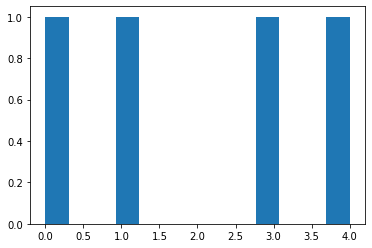

In [15]:
import matplotlib.pyplot as plt

x_pili = np.abs(df.loc[df['TotalPili']>0,'piliB_piliD'].values)
print(np.mean(x_pili))
print(np.median(x_pili))
plt.hist(x_pili, bins = 13)
plt.show()

0.11874314943368652
0.09462915601023017


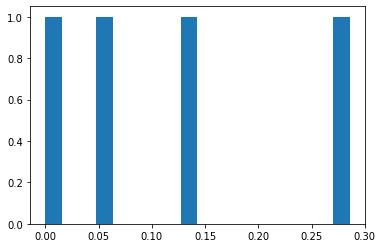

In [16]:
y_pili = np.abs(df.loc[df['TotalPili']>0,'piliB_piliD_over_Tot'].values)
print(np.mean(y_pili))
print(np.median(y_pili))
plt.hist(y_pili, bins = 18)
plt.show()